In [19]:
# permutations of actions and queue

In [20]:
import pandas as pd
import numpy as np
import random
from random import randrange
import time
import os
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import itertools
from itertools import permutations
from itertools import combinations
import multiprocessing
from multiprocessing import Process
from multiprocessing import Pool

from copy import deepcopy

# https://www.redblobgames.com/grids/circle-drawing/

In [21]:
class world:
    def __init__(self,size):
        self.size = size
        self.fig = None
        self.grid = None
        self.coin_locations = []
        self.enemy_locations = []

    def generate_map(world):
        # generate a grid with the dimensions of world.Size
        grid = np.zeros([world.size,world.size])
    
        fig = plt.figure(figsize = [5,5])
        plt.xlim(0,world.size)
        plt.ylim(0,world.size)

        world.grid = grid
        world.fig = fig

    def add_enemy(world,location):
        # add an enemy to the grid at the specified location
        world.grid[location[0],location[1]] = 2
        world.enemy_locations.append(location)
    

In [22]:
class entity:
    def __init__(self,world):
        self.world = world
        self.is_spawned = False

        if self.is_spawned == False:
            self.location = [0,0]
            
        elif self.is_spawned == True:
            x_loc = world.grid[np.where(world.grid[:,0] == max(world.grid))]
            print('x: ',x_loc)
            y_loc = world.grid[np.where(world.grid[0,:] == max(world.grid))]
            print('y: ',y_loc)
            self.location = [x_loc,y_loc]

        self.speed = 6
        self.coins = 0


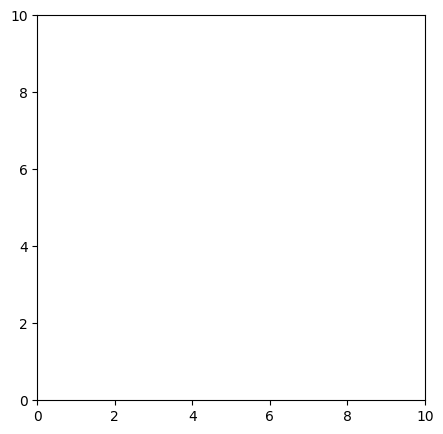

In [23]:
stage = world(10)
stage.generate_map()
actor = entity(stage)
stage.add_enemy([1,1])

In [24]:
queue = {
    'action': [],
    'destination': [],
    'metadata': []
}


In [25]:
# create observer class
class Observer:
    def __init__(self, name):
        self.name = name

    def update(self, queue):
        print(f'{self.name} received: {queue}')


class Observable:
    def __init__(self):
        self.observers = []

    def add_observer(self, observer):
        self.observers.append(observer)

    def remove_observer(self, observer):
        self.observers.remove(observer)

    def notify_observers(self, queue):
        for observer in self.observers:
            observer.update(queue)

    def update_queue(self, queue):
        self.notify_observers(queue)
    

In [26]:
# What Should Be Happening?


# this example permutation is an action-series representing two move actions
# these permutations can range from 1 to 8 numbers in length, and contain numbers 0 through 6. 
# I'm only trying to flesh out the permutations that contain 0s, and the 0s represent move actions
# Example Permutation: [0,0]

# Step 1
# Create 8 new ones
# [ [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0] ]

# Step 2
# Replace the first 0 in each with an adjacent location
# [ [[0,[-1,-1]],0], [[0,[-1,1]],0], [[0,[1,-1]],0], [[0,[1,0]],0], [[0,[0,1]],0], [[0,[-1,0]],0], [[0,[0,-1]],0], [[0,[1,1]],0] ]

# Step 3
# Create 8 copies of each of the above
# [ [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0]]
# [ [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0]]
# [ [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0]]
# [ [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0]]
# [ [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0]]
# [ [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0]]
# [ [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0]]
# [ [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0]]

# Step 4
# Replace the second 0 in each with an adjacent location to the first 0
# [ [ [0,[-1,-1]],[0,[-2,-2]] ], [ [0,[-1,-1]],[0,[-1,-2]] ], [ [0,[-1,-1]],[0,[0,-2]] ], [ [0,[-1,-1]],[0,[0,-1]] ], [ [0,[-1,-1]],[0,[0,0]] ], [ [0,[-1,-1]],[0,[-1,0]] ], [ [0,[-1,-1]],[0,[-2,0]] ], [ [0,[-1,-1]],[0,[-2,-1]] ] ]
# [ [ [0,[-1,1]],[0,[-2,-1]] ],  [ [0,[-1,1]],[0,[-1,-1]] ],  [ [0,[-1,1]],[0,[0,-1]] ],  [ [0,[-1,1]],[0,[0,0]] ],   [ [0,[-1,1]],[0,[0,1]] ],  [ [0,[-1,1]],[0,[-1,1]] ],  [ [0,[-1,1]],[0,[-2,1]] ],  [ [0,[-1,1]],[0,[-2,0]] ] ]
# [ [ [0,[1,-1]],[0,[0,-2]] ],   [ [0,[1,-1]],[0,[1,-2]] ],   [ [0,[1,-1]],[0,[1,0]] ],   [ [0,[1,-1]],[0,[0,0]] ],   [ [0,[1,-1]],[0,[2,0]] ],  [ [0,[1,-1]],[0,[2,-1]] ],  [ [0,[1,-1]],[0,[2,-2]] ],  [ [0,[1,-1]],[0,[0,-2]] ] ]
# [ [ [0,[1,0]],[0,[2,-1]] ],    [ [0,[1,0]],[0,[1,-1]] ],    [ [0,[1,0]],[0,[0,-1]] ],   [ [0,[1,0]],[0,[0,0]] ],    [ [0,[1,0]],[0,[0,1]] ],   [ [0,[1,0]],[0,[1,1]] ],    [ [0,[1,0]],[0,[2,1]] ],    [ [0,[1,0]],[0,[2,0]] ] ]
# [ [ [0,[0,1]],[0,[-1,0]] ],    [ [0,[0,1]],[0,[0,0]] ],     [ [0,[0,1]],[0,[1,0]] ],    [ [0,[0,1]],[0,[1,1]] ],    [ [0,[0,1]],[0,[1,2]] ],   [ [0,[0,1]],[0,[0,2]] ],    [ [0,[0,1]],[0,[-1,2]] ],   [ [0,[0,1]],[0,[-1,1]] ] ]
# [ [ [0,[-1,0]],[0,[-2,1]] ],   [ [0,[-1,0]],[0,[-1,1]] ],   [ [0,[-1,0]],[0,[0,1]] ],   [ [0,[-1,0]],[0,[0,0]] ],   [ [0,[-1,0]],[0,[0,-1]] ], [ [0,[-1,0]],[0,[-1,-1]] ], [ [0,[-1,0]],[0,[-2,-1]] ], [ [0,[-1,0]],[0,[-2,0]] ] ]
# [ [ [0,[0,-1]],[0,[1,-2]] ],   [ [0,[0,-1]],[0,[0,-2]] ],   [ [0,[0,-1]],[0,[-1,-2]] ], [ [0,[0,-1]],[0,[-1,-1]] ], [ [0,[0,-1]],[0,[-1,0]] ], [ [0,[0,-1]],[0,[0,0]] ],   [ [0,[0,-1]],[0,[1,0]] ],   [ [0,[0,-1]],[0,[1,-1]] ] ]
# [ [ [0,[1,1]],[0,[0,0]] ],     [ [0,[1,1]],[0,[1,0]] ],     [ [0,[1,1]],[0,[2,0]] ],    [ [0,[1,1]],[0,[2,1]] ],    [ [0,[1,1]],[0,[2,2]] ],   [ [0,[1,1]],[0,[1,2]] ],    [ [0,[1,1]],[0,[0,2]] ],    [ [0,[1,1]],[0,[0,1]] ] ]

# Step 5
# put the indidual action-series into a single list


# what is the ideal output?
# the ideal output would come out as a single list such as the following:
# [
#     [ [0,[-1,-1]],[0,[-2,-2]] ], 
#     [ [0,[-1,-1]],[0,[-1,-2]] ], 
#     [ [0,[-1,-1]],[0,[0,-2]] ], 
#     [ [0,[-1,-1]],[0,[0,-1]] ], 
#     [ [0,[-1,-1]],[0,[0,0]] ], 
#     [ [0,[-1,-1]],[0,[-1,0]] ], 
#     [ [0,[-1,-1]],[0,[-2,0]] ], 
#     [ [0,[-1,-1]],[0,[-2,-1]] ]
#
#
# ]

In [27]:
# action_series
# location_series

# each action_series and location_series will need an identifier
# the identifier is for the purpose of identifying which location_series are associated with which action_series in a many (location_series) to one (action_series) relationship

# so what the new process should look like is:
# step 1: create the initial 650 permutations of all the actions
# there will need to be 2 collection lists, we'll call those all_action_series and all_location_series


# step 2: for each action_series, if it contains a 0 or 2 (move or attack), create 8 associated location_series lists
# setting the first number in both as the action_series number, which is the identifier


# step 3: 

In [28]:
def adjacent_locations(pos):
    adjacent_locations_list = []
    # for an 8 directional grid
    for i in range(-1,2):
        for j in range(-1,2):
            adjacent_locations_list.append([pos[0]+i,pos[1]+j])
    if pos in adjacent_locations_list:
        adjacent_locations_list.remove(pos)
    return adjacent_locations_list



In [29]:
from itertools import chain, combinations

# Chebyshev 
def chebyshev_distance(pos1,pos2):
    return max(abs(pos1[0]-pos2[0]),abs(pos1[1]-pos2[1]))

# create a power set of all coordinates 6 spaces away from (0,0) according to the Chebyshev distance
locations = []
for x in range(-6,7):
    for y in range(-6,7):
        if chebyshev_distance((0,0),[x,y]) <= 6:
            locations.append((x,y))
print(locations)
print(len(locations))


# I should order the locations by the Chebyshev distance from the origin
locations = sorted(locations,key=lambda x: chebyshev_distance((0,0),x))



def is_legal(sequence, origin=(0,0)):
    # is the first entity the origin, if not false
    if sequence == []:
        return False
    elif sequence[0] != origin:
        return False

    # is the length 8 or less
    if len(sequence) > 8:
        return False
    
    # is the distance between each entity 1 or less
    for i in range(len(sequence)-1):
        if chebyshev_distance(sequence[i],sequence[i+1]) > 1:
            return False
    
    return True


def classical_recursive_one(elems):
    yield [] # first return the result we’re sure about 
    for i in range(len(elems)):
        for x in classical_recursive_one(elems[i+1:]): 
            # induction part
            yield [elems[i]] + x
             
def classical_iterative(elems):
    powerset_size = 2**len(elems)
    print('Powerset Size: ',powerset_size)
    counter = 0
    j = 0
 
    for counter in range(0, powerset_size):
        print(counter)
        results = []
        for j in range(0, len(elems)):
            # take the element if on bit position j it says to take it (i.e. 1 appears)
            if((counter & (1 << j)) > 0):
                results.append(elems[j])
        if is_legal(results):
            yield results
        else:
            continue

def powerset(iterable):
    "powerset([1,2,3]) → () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    results = chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
    
    good_results = []
    for result in results:
        if is_legal(list(result)):
            good_results.append(result)
            yield result
        else:
            continue

    print('Good Results: ',len(good_results))
    return good_results

#powerset_results = powerset(locations)
#powerset_results

#for x in classical_recursive_one(locations):
#for x in classical_iterative(locations):

#for x in powerset_results:
#    print(x)

#moves = classical_iterative(locations)


[(-6, -6), (-6, -5), (-6, -4), (-6, -3), (-6, -2), (-6, -1), (-6, 0), (-6, 1), (-6, 2), (-6, 3), (-6, 4), (-6, 5), (-6, 6), (-5, -6), (-5, -5), (-5, -4), (-5, -3), (-5, -2), (-5, -1), (-5, 0), (-5, 1), (-5, 2), (-5, 3), (-5, 4), (-5, 5), (-5, 6), (-4, -6), (-4, -5), (-4, -4), (-4, -3), (-4, -2), (-4, -1), (-4, 0), (-4, 1), (-4, 2), (-4, 3), (-4, 4), (-4, 5), (-4, 6), (-3, -6), (-3, -5), (-3, -4), (-3, -3), (-3, -2), (-3, -1), (-3, 0), (-3, 1), (-3, 2), (-3, 3), (-3, 4), (-3, 5), (-3, 6), (-2, -6), (-2, -5), (-2, -4), (-2, -3), (-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-2, 3), (-2, 4), (-2, 5), (-2, 6), (-1, -6), (-1, -5), (-1, -4), (-1, -3), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3), (-1, 4), (-1, 5), (-1, 6), (0, -6), (0, -5), (0, -4), (0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, -6), (1, -5), (1, -4), (1, -3), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, -6), (2, -5), (2, -4), (2, -3), (2, -

In [30]:
# lets start working out how the attack subactions will work
# that specifically includes extra attack, 
# drawing a weapon, 
# sheathing a weapon, 
# and other interchangeable options such as shove and grapple

# this would also have to account for switching out every weapon they have in their equipment...
# https://5e.tools/quickreference.html#bookref-quick,3,the%20order%20of%20combat
# this actually is considered as part of the free object interaction


# Unarmed Strikes
# Non-lethal damage...

# Disarm
# Grapple
# Mark
# Shove
# Shove Aside
# Two-Weapon Fighting


In [31]:
# lets create the power set for action_series
from itertools import chain, combinations

subaction_dict = {
    '0': 'Move_One',                # needs a target
    '1': 'Move_Two',
    '2': 'Move_Three',
    '3': 'Move_Four',
    '4': 'Object (Free)',      # needs a target
    '5': 'Attack',              # needs a target
    '6': 'Dodge',
    '7': 'Object',              # needs a target
    #'8': 'Disengage',
    #'9': 'Hide',
}

move_subactions = [0,1,2,3]
action_subactions = [5,6,7,8,9]
attack_subactions = [5]
free_subactions = [4]               # End Concentration will go here as well
bonus_subactions = []


def generate_turns():
    all_action_series = []

    for length in range(1, 9):  # Turns can be 1 to 8 actions long: 6 Moves, 1 Object Interaction, 1 Action
        for turn in itertools.product(range(len(subaction_dict.keys())), repeat=length):
            if validate_turn(turn):
                yield turn
    
    return list(all_action_series)


def validate_turn(turn):
    # options 0, 1, and 2 are now Move Variants
    # a player can only move 6 times in a turn
    # 0 uses 1 move, 1 uses 2 moves, 2 uses 3 moves
    # options 3 and 8 are now Object Interactions
    
    move_count = 0
    individual_move_count = 0
    object_interact_count = 0
    action_count = 0



    for action in turn:
        if action == 0:
            move_count += 1
            individual_move_count += 1

        if action == 1:
            move_count += 2
        
        if action == 2:
            move_count += 3
        
        if action == 3:
            move_count += 4

        if action in [4, 7]:
            object_interact_count += 1
        
        if action in action_subactions:
            action_count += 1
        
    return (move_count <= 6 and 
            individual_move_count <= 3 and
            object_interact_count <= (2 if 7 in turn else 1) and 
            action_count <= 1)

def remove_redundant_turns():
    turns = generate_turns()
    solid_turns = list(turns)
    #print(turns)
    # what types of moves are redundant?
    # any combo that contains either 3 or 6 but not both and is otherwise the same is redundant
    # first, lets create a list of all the unique permutations
    #turns = turns
    # then, lets create a list of all the permutations that contain either 3 or 6
    #object_interact_turns = [turn for turn in turns if 3 in turn and 6 not in turn or 6 in turn and 3 not in turn]
    # any permutations that are the same other than 3 and 6 should be isolated
    #object_interact_turns = [turn for turn in object_interact_turns if turn not in [x for x in turns if x not in object_interact_turns]]
    
    # then I only need to keep one of the two
    #for turn in object_interact_turns:
    #    if 3 in turn:
    #        turns.remove([x for x in turns if 6 in x and x != turn][0])
    #    elif 6 in turn:
    #        turns.remove([x for x in turns if 3 in x and x != turn][0])

    # any turns that contain three adjacent 0s, two adjacent 0s, or a 0 and a 1 are redundant
    turns_to_remove = []

    for turn in solid_turns:
        adjacent_0_count = 0
        adjacent_1_count = 0
        adjacent_0_1_count = 0
        adjacent_0_2_count = 0
        adjacent_1_2_count = 0

        for i in range(len(turn)-1):
            
            if turn[i] == 0 and turn[i+1] == 0:
                adjacent_0_count += 1
            
            if turn[i] == 1 and turn[i+1] == 1:
                adjacent_1_count += 1
            
            if turn[i] == 0 and turn[i+1] == 1 or turn[i] == 1 and turn[i+1] == 0:
                adjacent_0_1_count += 1
            
            if turn[i] == 0 and turn[i+1] == 2 or turn[i] == 2 and turn[i+1] == 0:
                adjacent_0_2_count += 1

            if turn[i] == 1 and turn[i+1] == 2 or turn[i] == 2 and turn[i+1] == 1:
                adjacent_1_2_count += 1

        if adjacent_0_count > 0:
            turns_to_remove.append(turn)
        if adjacent_1_count > 0:
            turns_to_remove.append(turn)
        if adjacent_0_1_count > 0:
            turns_to_remove.append(turn)
        if adjacent_0_2_count > 0:
            turns_to_remove.append(turn)
        if adjacent_1_2_count > 0:
            turns_to_remove.append(turn)

    # remove duplicates in turns_to_remove
    turns_to_remove = list(set(turns_to_remove))

    for turn in turns_to_remove:
        solid_turns.remove(turn)

    return solid_turns



def choose_turn():
    non_reduntant_turns = remove_redundant_turns()
    all_action_series = {i:turn for i,turn in enumerate(non_reduntant_turns) if validate_turn(turn)}
    print(len(all_action_series))
    #print(all_action_series)
    return all_action_series

In [32]:
def apply_permutations_to_location_series3(entity, action_series_dict, location_series_dict, one_space_permutations, two_space_permutations, three_space_permutations, four_space_permutations):
    # defining each element in the function:
    #   action_series                 - a set of numbers which each represent a sub-action an entity can take
    #   action_series_dict            - a dictionary containing all unique and legal action_series
    #   location_series               - a set of multiple (x,y) coordinates which represent the locations being targeted by the associated action_series
    #   permtuation_set               - the full power set of permutations of location_series, including illegal and illogical ones
    #   location_series_dict          - a dictionary containing all unique and legal location_series for the matching action_series from action_series_dict


    # what needs to happen in this function is for each action_series stored in action_series_dict,
    # each location_series in the appropriate permutation_set should be evaluated if it's appropriate for that action_series,
    # and if it meets all the criteria it should be stored in the location_series_dict
    # lastly, the function returns the finished location_series_dict


    # the current criteria that each location_series needs to meet:
    #   - the location_series must have the same number of locations as the associated action_series requires (i.e. length must match length)
    #   - the first location cannot be further away from the entity's starting position than the first move_action (either 1-4 spaces)
    #   - locations associated with the attack sub_action (currently represented by 5) cannot be more than 1 space away
    #   - locations associated with the attack sub_action cannot not be (or must be) in the enemy_locations list (because you can't target an empty space...yet)

    # the eventual criteria that each location_series should meet:
    #   - cannot move through obstructed spaces (requires cell states to be implemented)


    # the current problem I'm facing is that some locations are being stored in location_series_dict fine and some aren't
    # 

    enemy_locations = entity.world.enemy_locations


    def determine_permutation_series(key, action_series, action_series_dict, one_space_permutations, two_space_permutations, three_space_permutations, four_space_permutations):
        # if the action_series contains 0 and not 1, 2, or 3, 
        # --and thus the entity is only moving a maximum of 1 space-- 
        # use one_space_permutations (the list of permutations for spaces within 1 space)
        
        if 0 in action_series_dict[key] and 1 not in action_series_dict[key] and 2 not in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = one_space_permutations

        # if the action_series contains 1 and not 2 or 3, 
        # --and thus the entity is moving a maximum of 2 spaces--
        # then use two_space_permutations (the list of permutations for spaces within both 1 and 2 spaces)

        elif 1 in action_series_dict[key] and 2 not in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = two_space_permutations

        # if the action_series contains 2 and not 3, 
        # --and thus the entity is moving a maximum of 3 spaces--
        # then use three_space_permutations (the list of permutations for spaces within 1, 2, and 3 spaces)

        elif 2 in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = three_space_permutations

        # otherwise, use four_space_permutations
        else:
            permutation_set = four_space_permutations
        
        return permutation_set


    for key, action_series in action_series_dict.items():
        entity_location = entity.location
        permutation_set = determine_permutation_series(key, action_series, action_series_dict, one_space_permutations, two_space_permutations, three_space_permutations, four_space_permutations)
        number_of_locations_needed = sum(action_series.count(i) for i in [0,1,2,3,5])
        targeting_actions_only = list([x for x in action_series if x in [0,1,2,3,5]])

        for location_series in permutation_set:
            is_valid = True

            # first condition: the number of locations given must equal the number of locations needed
            if len(location_series) != number_of_locations_needed:
                #print('length difference')
                is_valid = False
                continue

            
            if 5 in action_series:
                # second condition: the first location must a distance less than or equal to the distance allowed by the first move action
                first_move_action = next(               # the first move action needs to be the first move tyep subaction (i.e. 0,1,2,3) in the action_series
                    # this will be used to calculate the distance that is allowable (aka first_move_action + 1)
                    (item for item in action_series if item in [0,1,2,3,5]),
                    None)    # I will need to adjust this later so that if no locations are present the action_series is skipped
                    
                

                if first_move_action == None:
                    # aka if there aren't any move actions in the location_series
                    # aka if it's only comprised of 4,5,6,7...
                    pass
                else:
                    # so first_move_action is not None, so it's either 0,1,2, or 3
                    if targeting_actions_only[0] == 5:
                        first_move_associated_location = location_series[1]
                    else:
                        # so the first item
                        first_move_associated_location = location_series[0]
            
                spaces_that_can_be_moved = first_move_action + 1
                if chebyshev_distance(entity_location,first_move_associated_location) > spaces_that_can_be_moved:
                    is_valid = False
                    continue

                # third condition: attacks can only target locations 1 space away and those in enemy_locations
                # currently there can only be 1 attack action per turn

                attack_action_series_item_index = action_series.index(5)
                attack_targeting_series_item_index = targeting_actions_only.index(5)
                attack_associated_location = location_series[attack_targeting_series_item_index]
            
                if next((item for item in action_series if item in [0,1,2,3,5]),None) != 5:
                    # aka if the first item in action_series that needs a location isn't 5, 
                    # aka if the entity moves before attacking,
                    # then the entity's location must be determined before checking if the distance is appropriate
                    # so find the location prior to the attack_associated_location
                    new_entity_location_item_index = attack_targeting_series_item_index - 1
                    entity_location = location_series[new_entity_location_item_index]

                if chebyshev_distance(entity_location,attack_associated_location) > 1:
                    is_valid = False
                    continue

                if attack_associated_location not in enemy_locations:
                    is_valid = False
                    continue

            else:
                # second condition: the first location must a distance less than or equal to the distance allowed by the first move action
                first_move_action = next(               # the first move action needs to be the first move tyep subaction (i.e. 0,1,2,3) in the action_series
                    # this will be used to calculate the distance that is allowable (aka first_move_action + 1)
                    (item for item in action_series if item in [0,1,2,3]),
                    None)    # I will need to adjust this later so that if no locations are present the action_series is skipped
                
                if first_move_action == None:
                    # aka if there aren't any move actions in the location_series
                    # aka if it's only comprised of 4,5,6,7...
                    pass
                else:
                    # so first_move_action is not None, so it's either 0,1,2, or 3
                        # so the first item
                    first_move_associated_location = location_series[0]

                    # I will eventually need a more complicated way of evaluating this 
                    # the location associated with the first move is more challenging to locate
                    # this is because the action_series is a different length than the location_series
                    # additionally, there are 5's which aren't move subactions, but still require a location for targeting
                    # because of this, the logic has to be:
                    #   the first_move_action is the first item in the action_series that is in the move_subaction list (0,1,2,3)
                    #   the first_move_associated_location is the item in the location_series associated with the first_move_action, 
                    #       however, attack subactions have locations, so it isn't simply the first item in the list 
                    #       rather it is the first item in the location_series list where the...


                spaces_that_can_be_moved = first_move_action + 1
                if chebyshev_distance(entity_location,first_move_associated_location) > spaces_that_can_be_moved:
                    is_valid = False
                    continue

            

            if is_valid:
                location_series_dict[key].append(location_series)

    
    return location_series_dict



In [33]:
def apply_permutations_to_location_series2(entity, action_series_dict, location_series_dict, one_space_permutations, two_space_permutations, three_space_permutations, four_space_permutations):
    for key, action_series in action_series_dict.items():

        #print(f'Action Series under review: {action_series}')
        # if action_series contains 0 and not 1, 2, or 3, then use move_one_locations
        if 0 in action_series_dict[key] and 1 not in action_series_dict[key] and 2 not in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = one_space_permutations
            #print(f'Permutations being used: #1')

        # if action_series contains 1 and not 2 or 3, then use move_two_locations
        elif 1 in action_series_dict[key] and 2 not in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = two_space_permutations
            #print(f'Permutations being used: #2')


        # if action_series contains 2 and not 3, then use move_three_locations
        elif 2 in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = three_space_permutations
            #print(f'Permutations being used: #3')


        # else use move_four_locations
        else:
            permutation_set = four_space_permutations
            #print(f'Permutations being used: #4')


        # serious issues at 8, 13, and 15 however 4, 5, 6, and 7 are also not being assigned full location_series
        # 4: (4,),
        # 5: (5,),
        # 6: (6,),
        # 7: (7,),
        # 8: (0, 3),
        # 13: (1, 3),
        # 15: (1, 5),

        # 4, 5, 6, and 7 simply don't need locations assigned to them yet (until object actions are handled) so that's fine
        # 8, 13, and 15 are the first where there's more than one location being needed



        enemy_locations = entity.world.enemy_locations
        number_of_locations_needed = sum(action_series.count(i) for i in [0,1,2,3,5])
        #print(f'Locations needed: {number_of_locations_needed}')
        
        for location_series in permutation_set:
            #print(f'Checking location series: {location_series}')

            is_valid = True
            loc_index = 0

            if len(location_series) != number_of_locations_needed:
                is_valid = False
                #break


            for i in range(len(action_series)):
                


                if action_series[i] in [0,1,2,3,5]:

                    if loc_index >= len(location_series):
                        is_valid = False
                        break


                    if action_series[i] == 5:
                        max_distance = 1
                    else:
                        max_distance = action_series[i]
                    
                    if chebyshev_distance(location_series[loc_index], [0, 0]) > max_distance:
                        # so this is calculating the distance between the character's starting point and the current location
                        # while the max_distance is calculated by taking the next action...not even an action with a location associated with it
                        # is this making sure the first move isn't further away from start than it is allowed to be?

                        is_valid = False
                        break

                    # this is where non-adjacent locations shouldn't be associated with the attack subaction 
                    if action_series[i] == 5:
                        #if key<20:
                            #print(f'Checking {key}: {location_series} for {i} in {action_series}')

                        if location_series[loc_index] not in enemy_locations:
                            #if key<20:
                                #print('location not in enemy locations')
                            is_valid = False
                            break

                    loc_index += 1

            if is_valid:
                location_series_dict[key].append(tuple(location_series))

        # Remove duplicates
        location_series_dict[key] = list(set(location_series_dict[key]))

    return location_series_dict


In [34]:
def calc_reward_for_action_series_location_series_combo(entity, eval_action_series, eval_location_series):
    reward = 0
    enemy_locations = entity.world.enemy_locations
    coin_locations = entity.world.coin_locations
    #print("Enemy locations:", enemy_locations)
    #print('running calc_reward_function')


    # how should actions be evaluated?
    # - if an attack action (5) is taken and there isn't a target within range it should be punished

    #print("Original action series:", eval_action_series)
    #print(list(eval_action_series))
    
    eval_action_series_only_targeting = list([x for x in eval_action_series if x not in [4,6,7]])
    #print("Filtered action series:", eval_action_series_only_targeting)

    eval_location_series = list(eval_location_series)
    #print("Location series:", eval_location_series)

    location_index = 0
    print('running calc combo')
    print(eval_action_series)
    
    for action_index, action in enumerate(eval_action_series):
        #print('action: ',action)
        #print(f"Processing action {action} at index {action_index}")
        #print('running test 2')
        #if action == 5:  # Attack action
        #    if location_index < len(eval_location_series):
        #        current_location = eval_location_series[location_index]
        #        spaces_within_melee_range = adjacent_locations(current_location)
                #print(f"Checking attack location: {current_location}")
                
        #        available_targets = [x for x in spaces_within_melee_range if x in enemy_locations]

        #        if current_location not in enemy_locations:
        #            reward -= 1
        #            print('-1 modifier from attack not targeting enemy')
                    #print(f"Attack location {current_location} not in enemy_locations. Penalty applied. Reward: {reward}")
        #        else:
                    #print(f"Attack location {current_location} is in enemy_locations. No penalty.")
        #            pass

        #        location_index += 1
        #    else:
                #print("No corresponding location for this attack action. Skipping.")
        #        pass
        

        #elif action in [0, 1, 2, 3]:  # Movement actions
        #    if location_index < len(eval_location_series):
        #        location_index += 1
    
    # - if the attack action targets a creature, rewarded
        if action == 5:
            print('5 check')
            try:
                if eval_location_series[action_index] in enemy_locations:
                    reward += 1
                    print('+1 modifier from targeting creature')
            except:
                continue

    # - if the same locations are being passed over, it should be punished slightly
        if len(set(eval_location_series)) < len(eval_location_series):
            reward -= 1
            



    # - if the movement prompts an opportunity attack, punished
        # if there are two consecutive movement actions, 

        if action in [0,1,2,3] and action+1 in [0,1,2,3] and 8 not in eval_action_series:

            # and the first is adjacent to one of the spaces in the enemy_location list,
            spaces_adjacent_to_enemy_locations = []
            for enemy_location in enemy_locations:
                spaces_adjacent_to_enemy_locations.append(adjacent_locations(enemy_location))
            
            try:
                #print(eval_location_series)
                #print(eval_action_series.index(action))
                #print(spaces_adjacent_to_enemy_locations)
                if eval_location_series[action_index] in spaces_adjacent_to_enemy_locations:
                    if eval_location_series[action_index+1] not in spaces_adjacent_to_enemy_locations:
                        reward -= 1
            except:
                continue
        # and the second is not,
        # and the disengage action is not taken,
        # reduce the reward
        

    # - if the movement gets within melee range, punished
    # - if the movement is unoptimal, slightly punished
        # could use a triangle between points...


    # - if an action isn't taken, punished because the dodge action is always better than nothing
    if 5 in eval_action_series or 6 in eval_action_series or 7 in eval_action_series or 8 in eval_action_series:
        reward += 1

    # - if the dodge action is taken, it should be rewarded
    if 6 in eval_action_series:
        reward += 1

        #action_numbers = [5,6,7,8]
        #check_list = [x for x in action_numbers if x in eval_action_series]
        #for number in range(len(action_numbers)):
        #    if number in eval_action_series:
        #        check_list[number] = True

        #if check_list != []:
        #    reward += 1

    # - if the action series is longer than needed, slightly punished
        # if there are two object interactions, but after the first one, 
        # there isn't any objects within range, 
        # punish

    # - if the object interaction feature picks up an item, rewarded
    #if 4 in eval_action_series and eval_location_series[eval_action_series.index(4)] not in coin_locations:
    #    reward -= 1
    
    #if 7 in eval_action_series and eval_location_series[eval_action_series.index(7)] not in coin_locations:
    #    reward -=1

    # - if the entity is within a straight uninterrupted line of an enemy, slightly punished
    # - if the spaces moved through are difficult terrain
    # - if the entity is hidden from the enemy, rewarded
    # - if the entity's HP is the same or greater than last round
    
    # I might need several metrics, 
    # what probabilities exist:
    # - the probability of the entity taking damage from the enemy
    # - the probability of the the entity dealing damage from the enemy


    return reward
    

In [35]:
def calc_rewards_for_location_series(entity, reward_series_dict, location_series_dict, action_series_dict):
    
    for key in action_series_dict.keys():
        for location_series in location_series_dict[key]:
            #print(f'Location series {location_series} at item {key}: {action_series_dict[key]}')
            
            # calc reward score for each action_series + location_series combo
            eval_action_series = action_series_dict[key]
            eval_location_series = location_series
            
            print('action series: ',eval_action_series)
            print('location series: ',eval_location_series)


            reward_value = calc_reward_for_action_series_location_series_combo(entity, eval_action_series, eval_location_series)
            print('reward: ',reward_value)
            print(' ')
            #reward_value = 0

            # append the reward to the dict 
            reward_series_dict[key].append(reward_value)
        print('------------------------------------------- ')
    
    return reward_series_dict



In [36]:
def generate_location_series(entity):
    # I could do a move_one_locations, move_two_locations, move_three_locations, etc.
    # each would be a list of spaces within the Chebyshev distance of 1, 2, 3, etc.

    locations_within_range = []
    for x in range(-6,7):
        for y in range(-6,7):
            if chebyshev_distance(entity.location,(x,y)) <= 6:
                locations_within_range.append((x,y))

    move_one_locations = []
    move_two_locations = []
    move_three_locations = []
    move_four_locations = []
    move_five_locations = []
    move_six_locations = []

    for location in locations_within_range:
        if chebyshev_distance(entity.location,location) == 1:
            move_one_locations.append(location)
        if chebyshev_distance(entity.location,location) == 2:
            move_two_locations.append(location)
        if chebyshev_distance(entity.location,location) == 3:
            move_three_locations.append(location)
        if chebyshev_distance(entity.location,location) == 4:
            move_four_locations.append(location)
        if chebyshev_distance(entity.location,location) == 5:
            move_five_locations.append(location)
        if chebyshev_distance(entity.location,location) == 6:
            move_six_locations.append(location)

    print('Move One Locations: ',move_one_locations)
    print('Move Two Locations: ',move_two_locations)
    print('Move Three Locations: ',move_three_locations)
    print('Move Four Locations: ',move_four_locations)
    print('Move Five Locations: ',move_five_locations)
    print('Move Six Locations: ',move_six_locations)
    print('')

    ##### Now for Creating the Location Series #####
    # the most location targets I'll need in a single turn is now 4: moves 1-4 and attack
    # so I only need to create variations that are up to 4 long

    # what if instead of creating all the permutations, I did several based on distance

    # permutations within 1 space
    #one_space_permutations = list(itertools.permutations(move_one_locations,4))
    one_space_permutations = list(itertools.chain.from_iterable(combinations(move_one_locations, r) for r in range(0, 4)))
    print('One Space Locations: ',len(move_one_locations))
    print('One Space Permutations: ',len(one_space_permutations))
    print('One Space Permutations: ',one_space_permutations)

    #print(one_space_permutations)

    # permutations within 2 spaces
    #two_space_permutations = list(itertools.permutations(move_one_locations + move_two_locations,4))
    two_space_permutations = list(itertools.chain.from_iterable(combinations(move_one_locations + move_two_locations, r) for r in range(0, 4)))
    print('Two Space Locations: ',len(move_one_locations + move_two_locations))
    print('Two Space Permutations: ',len(two_space_permutations))
    #print(two_space_permutations)

    # permutations within 3 spaces
    # the distance between the two locations 
    #three_space_permutations = list(itertools.permutations(move_one_locations + move_two_locations + move_three_locations,4))
    three_space_permutations = list(itertools.chain.from_iterable(combinations(move_one_locations + move_two_locations + move_three_locations, r) for r in range(0, 4)))
    print('Three Space Locations: ',len(move_one_locations + move_two_locations + move_three_locations))
    print('Three Space Permutations: ',len(three_space_permutations))

    # permutations within 4 spaces
    #four_space_permutations = list(itertools.permutations(move_one_locations + move_two_locations + move_three_locations + move_four_locations,4))
    four_space_permutations = list(itertools.chain.from_iterable(combinations(move_one_locations + move_two_locations + move_three_locations + move_four_locations, r) for r in range(0, 4)))
    print('Four Space Locations: ',len(move_one_locations + move_two_locations + move_three_locations + move_four_locations))
    print('Four Space Permutations: ',len(four_space_permutations))


    # permutations within 5 spaces
    #five_space_permutations = list(itertools.permutations(move_one_locations + move_two_locations + move_three_locations + move_four_locations + move_five_locations,4))
    #print('Five Space Permutations: ',len(five_space_permutations))

    # permutations within 6 spaces

    # either the three_space_permutations should be two locations that are three spaces apart in order torepresent a move action type 2
    # However the issue with that approach is then I'll have to somehow include that pair whenever there's a 2 causing more iterations to be created 
    # the alternative is that the three_space_permutations are permutations where 3 space jumps are allowed
    # however 3 space jumps are only allowed up to 2 times in a turn

    # for the two_space_permutations, if the first location is more than 2 spaces away from entity.location, remove it
    #two_space_permutations = [x for x in two_space_permutations if chebyshev_distance(entity.Location,x[0]) <= 2]
    #three_space_permutations = [x for x in three_space_permutations if chebyshev_distance(entity.Location,x[0]) <= 3]
    #four_space_permutations = [x for x in four_space_permutations if chebyshev_distance(entity.Location,x[0]) <= 4]
    #five_space_permutations = [x for x in five_space_permutations if chebyshev_distance(entity.Location,x[0]) <= 4]

    # I only have ways of reducing the number of location series permutations after they are created
    # - remove those with a distance between any two locations greater than 4
    # need to include if the one_space_permutation doesn't include x[1] or x[2] because it's shorter than 4
    one_space_permutations = [x for x in one_space_permutations if (len(x) < 2 or chebyshev_distance(x[0], x[1]) <= 1) and (len(x) < 3 or chebyshev_distance(x[1], x[2]) <= 1) and (len(x) < 4 or chebyshev_distance(x[2], x[3]) <= 1)]

    #two_space_permutations = [x for x in two_space_permutations if chebyshev_distance(x[0],x[1]) <= 2 and chebyshev_distance(x[1],x[2]) <= 2 and chebyshev_distance(x[2],x[3]) <= 2]
    two_space_permutations = [x for x in two_space_permutations if (len(x) < 2 or chebyshev_distance(x[0], x[1]) <= 2) and (len(x) < 3 or chebyshev_distance(x[1], x[2]) <= 2) and (len(x) < 4 or chebyshev_distance(x[2], x[3]) <= 2)]

    #three_space_permutations = [x for x in three_space_permutations if chebyshev_distance(x[0],x[1]) <= 3 and chebyshev_distance(x[1],x[2]) <= 3 and chebyshev_distance(x[2],x[3]) <= 3]
    three_space_permutations = [x for x in three_space_permutations if (len(x) < 2 or chebyshev_distance(x[0], x[1]) <= 3) and (len(x) < 3 or chebyshev_distance(x[1], x[2]) <= 3) and (len(x) < 4 or chebyshev_distance(x[2], x[3]) <= 3)]

    #four_space_permutations = [x for x in four_space_permutations if chebyshev_distance(x[0],x[1]) <= 4 and chebyshev_distance(x[1],x[2]) <= 4 and chebyshev_distance(x[2],x[3]) <= 4]
    four_space_permutations = [x for x in four_space_permutations if (len(x) < 2 or chebyshev_distance(x[0], x[1]) <= 4) and (len(x) < 3 or chebyshev_distance(x[1], x[2]) <= 4) and (len(x) < 4 or chebyshev_distance(x[2], x[3]) <= 4)]

    # - remove permutations that have more than:
    #  3 two-space jumps
    #  2 three-space jumps
    #  1 four-space jump  
    two_space_permutations = [x for x in two_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 2]) <= 3]

    three_space_permutations = [x for x in three_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 3]) <= 2]
    three_space_permutations = [x for x in three_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 2]) <= 3]

    four_space_permutations = [x for x in four_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 4]) <= 1]
    four_space_permutations = [x for x in four_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 3]) <= 2]
    four_space_permutations = [x for x in four_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 2]) <= 3]

    # - remove those with the same location repeated
    #one_space_permutations = [x for x in one_space_permutations if x[0] != x[1] and x[1] != x[2] and x[2] != x[3]]

    one_space_permutations = [x for x in one_space_permutations if (len(x) < 2 or x[0] != x[1]) and (len(x) < 3 or x[1] != x[2]) and (len(x) < 4 or x[2] != x[3])]
    
    #two_space_permutations = [x for x in two_space_permutations if x[0] != x[1] and x[1] != x[2] and x[2] != x[3]]
    two_space_permutations = [x for x in two_space_permutations if (len(x) < 2 or x[0] != x[1]) and (len(x) < 3 or x[1] != x[2]) and (len(x) < 4 or x[2] != x[3])]

    #three_space_permutations = [x for x in three_space_permutations if x[0] != x[1] and x[1] != x[2] and x[2] != x[3]]
    three_space_permutations = [x for x in three_space_permutations if (len(x) < 2 or x[0] != x[1]) and (len(x) < 3 or x[1] != x[2]) and (len(x) < 4 or x[2] != x[3])]
    
    #four_space_permutations = [x for x in four_space_permutations if x[0] != x[1] and x[1] != x[2] and x[2] != x[3]]
    four_space_permutations = [x for x in four_space_permutations if (len(x) < 2 or x[0] != x[1]) and (len(x) < 3 or x[1] != x[2]) and (len(x) < 4 or x[2] != x[3])]

    # attempt at combining all the list comprehensions into one line for each
    #one_space_permutations = [x for x in one_space_permutations if all(chebyshev_distance(x[i], x[i+1]) <= 1 for i in range(3)) and len(set(x)) == 4]
    #two_space_permutations = [x for x in two_space_permutations if all(chebyshev_distance(x[i], x[i+1]) <= 2 for i in range(3)) and len(set(x)) == 4 and sum(chebyshev_distance(x[i], x[i+1]) == 2 for i in range(3)) <= 3]
    #three_space_permutations = [x for x in three_space_permutations if all(chebyshev_distance(x[i], x[i+1]) <= 3 for i in range(3)) and len(set(x)) == 4 and sum(chebyshev_distance(x[i], x[i+1]) == 3 for i in range(3)) <= 2 and sum(chebyshev_distance(x[i], x[i+1]) == 2 for i in range(3)) <= 3]
    #four_space_permutations = [x for x in four_space_permutations if all(chebyshev_distance(x[i], x[i+1]) <= 4 for i in range(3)) and len(set(x)) == 4 and sum(chebyshev_distance(x[i], x[i+1]) == 4 for i in range(3)) <= 1 and sum(chebyshev_distance(x[i], x[i+1]) == 3 for i in range(3)) <= 2 and sum(chebyshev_distance(x[i], x[i+1]) == 2 for i in range(3)) <= 3]



    print('')
    print('Filtered One Space Permutations: ',len(one_space_permutations))
    print('Filtered Two Space Permutations: ',len(two_space_permutations))
    print('Filtered Three Space Permutations: ',len(three_space_permutations))
    print('Filtered Four Space Permutations: ',len(four_space_permutations))

    print('')
    print(one_space_permutations[:10])
    print(two_space_permutations[10:20])
    print(three_space_permutations[20:30])
    print(four_space_permutations[100:120])



    action_series_dict = choose_turn()

    # now to create the location_series_dict
    location_series_dict = {x for x in action_series_dict.keys()}
    location_series_dict = {x:[] for x in location_series_dict}


    # apply_permutations_to_location_series(action_series_dict, one_space_permutations)
    location_series_dict = apply_permutations_to_location_series3(entity, action_series_dict, location_series_dict, one_space_permutations, two_space_permutations, three_space_permutations, four_space_permutations)

    # now I need to make the reward dictionary
    reward_series_dict = {x for x in action_series_dict.keys()}
    reward_series_dict = {x:[] for x in location_series_dict}

    reward_series_dict = calc_rewards_for_location_series(entity, reward_series_dict, location_series_dict, action_series_dict)
    


    return action_series_dict, location_series_dict, reward_series_dict

action_series_dict, location_series_dict, reward_series_dict = generate_location_series(actor)

Move One Locations:  [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
Move Two Locations:  [(-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-1, -2), (-1, 2), (0, -2), (0, 2), (1, -2), (1, 2), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2)]
Move Three Locations:  [(-3, -3), (-3, -2), (-3, -1), (-3, 0), (-3, 1), (-3, 2), (-3, 3), (-2, -3), (-2, 3), (-1, -3), (-1, 3), (0, -3), (0, 3), (1, -3), (1, 3), (2, -3), (2, 3), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3)]
Move Four Locations:  [(-4, -4), (-4, -3), (-4, -2), (-4, -1), (-4, 0), (-4, 1), (-4, 2), (-4, 3), (-4, 4), (-3, -4), (-3, 4), (-2, -4), (-2, 4), (-1, -4), (-1, 4), (0, -4), (0, 4), (1, -4), (1, 4), (2, -4), (2, 4), (3, -4), (3, 4), (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
Move Five Locations:  [(-5, -5), (-5, -4), (-5, -3), (-5, -2), (-5, -1), (-5, 0), (-5, 1), (-5, 2), (-5, 3), (-5, 4), (-5, 5), (-4, -5), (-4, 5), (-3, -5), (-3, 5), (-2, -5), (-2, 5), (-1, -5), (-1

In [ ]:
action_series_dict

{0: (0,),
 1: (1,),
 2: (2,),
 3: (3,),
 4: (4,),
 5: (5,),
 6: (6,),
 7: (7,),
 8: (0, 3),
 9: (0, 4),
 10: (0, 5),
 11: (0, 6),
 12: (0, 7),
 13: (1, 3),
 14: (1, 4),
 15: (1, 5),
 16: (1, 6),
 17: (1, 7),
 18: (2, 2),
 19: (2, 4),
 20: (2, 5),
 21: (2, 6),
 22: (2, 7),
 23: (3, 0),
 24: (3, 1),
 25: (3, 4),
 26: (3, 5),
 27: (3, 6),
 28: (3, 7),
 29: (4, 0),
 30: (4, 1),
 31: (4, 2),
 32: (4, 3),
 33: (4, 5),
 34: (4, 6),
 35: (4, 7),
 36: (5, 0),
 37: (5, 1),
 38: (5, 2),
 39: (5, 3),
 40: (5, 4),
 41: (6, 0),
 42: (6, 1),
 43: (6, 2),
 44: (6, 3),
 45: (6, 4),
 46: (7, 0),
 47: (7, 1),
 48: (7, 2),
 49: (7, 3),
 50: (7, 4),
 51: (0, 3, 0),
 52: (0, 3, 4),
 53: (0, 3, 5),
 54: (0, 3, 6),
 55: (0, 3, 7),
 56: (0, 4, 0),
 57: (0, 4, 1),
 58: (0, 4, 2),
 59: (0, 4, 3),
 60: (0, 4, 5),
 61: (0, 4, 6),
 62: (0, 4, 7),
 63: (0, 5, 0),
 64: (0, 5, 1),
 65: (0, 5, 2),
 66: (0, 5, 3),
 67: (0, 5, 4),
 68: (0, 6, 0),
 69: (0, 6, 1),
 70: (0, 6, 2),
 71: (0, 6, 3),
 72: (0, 6, 4),
 73: (0, 7,

In [ ]:
print('Location Series: ',sum(len(value) for value in location_series_dict.values()))
for i in range(len(location_series_dict)):
    print(f'{i}: {location_series_dict[i]}')

Location Series:  0
0: []
1: []
2: []
3: []
4: []
5: []
6: []
7: []
8: []
9: []
10: []
11: []
12: []
13: []
14: []
15: []
16: []
17: []
18: []
19: []
20: []
21: []
22: []
23: []
24: []
25: []
26: []
27: []
28: []
29: []
30: []
31: []
32: []
33: []
34: []
35: []
36: []
37: []
38: []
39: []
40: []
41: []
42: []
43: []
44: []
45: []
46: []
47: []
48: []
49: []
50: []
51: []
52: []
53: []
54: []
55: []
56: []
57: []
58: []
59: []
60: []
61: []
62: []
63: []
64: []
65: []
66: []
67: []
68: []
69: []
70: []
71: []
72: []
73: []
74: []
75: []
76: []
77: []
78: []
79: []
80: []
81: []
82: []
83: []
84: []
85: []
86: []
87: []
88: []
89: []
90: []
91: []
92: []
93: []
94: []
95: []
96: []
97: []
98: []
99: []
100: []
101: []
102: []
103: []
104: []
105: []
106: []
107: []
108: []
109: []
110: []
111: []
112: []
113: []
114: []
115: []
116: []
117: []
118: []
119: []
120: []
121: []
122: []
123: []
124: []
125: []
126: []
127: []
128: []
129: []
130: []
131: []
132: []
133: []
134: []
135: []
13

In [ ]:
print('Reward Series: ',sum(len(value) for value in reward_series_dict.values()))
#print('Empty Reward Series: ',sum())
for i in range(len(reward_series_dict)):
    print(f'{i}: {reward_series_dict[i]}')

Reward Series:  0
0: []
1: []
2: []
3: []
4: []
5: []
6: []
7: []
8: []
9: []
10: []
11: []
12: []
13: []
14: []
15: []
16: []
17: []
18: []
19: []
20: []
21: []
22: []
23: []
24: []
25: []
26: []
27: []
28: []
29: []
30: []
31: []
32: []
33: []
34: []
35: []
36: []
37: []
38: []
39: []
40: []
41: []
42: []
43: []
44: []
45: []
46: []
47: []
48: []
49: []
50: []
51: []
52: []
53: []
54: []
55: []
56: []
57: []
58: []
59: []
60: []
61: []
62: []
63: []
64: []
65: []
66: []
67: []
68: []
69: []
70: []
71: []
72: []
73: []
74: []
75: []
76: []
77: []
78: []
79: []
80: []
81: []
82: []
83: []
84: []
85: []
86: []
87: []
88: []
89: []
90: []
91: []
92: []
93: []
94: []
95: []
96: []
97: []
98: []
99: []
100: []
101: []
102: []
103: []
104: []
105: []
106: []
107: []
108: []
109: []
110: []
111: []
112: []
113: []
114: []
115: []
116: []
117: []
118: []
119: []
120: []
121: []
122: []
123: []
124: []
125: []
126: []
127: []
128: []
129: []
130: []
131: []
132: []
133: []
134: []
135: []
136:

In [ ]:
def Choose_Turn(world, entity, show_turns: bool):
    turn_options = generate_turns()
    all_action_series = {i:turn for i,turn in enumerate(turn_options) if validate_turn(turn)}
    all_location_series = {key:[] for key in all_action_series.keys()}

    # I only want the first 100 key value pairs
    all_action_series = {key:all_action_series[key] for key in range(100)}
    all_location_series = {key:all_location_series[key] for key in range(100)}

    print('Before Fleshing Out:',len(all_action_series))

    # the next thing that happens is the move and attack actions are fleshed out
    #flesh_out_move2(all_action_series, all_location_series, entity)

    flesh_out_actions2(all_action_series, all_location_series, world, entity)

    print(all_action_series)
    print(all_location_series)
    # only do the first 100
    # fleshed_out_movement_turns = []
    # for turn in valid_turns:
        #print(turn)
    #     new_turn = flesh_out_move(turn,entity)
    #    print(new_turn)
    #    fleshed_out_movement_turns.extend(new_turn)


    # if show_turns:
    #    print('Valid Turns:', len(fleshed_out_movement_turns))
    #    for turn in fleshed_out_movement_turns:
    #        print(turn)
    
    #best_turn = None
    #best_score = float('-inf')

    #for turn in fleshed_out_movement_turns:
    #    score = calc_rewards(turn, entity)
    #    if score > best_score:
    #        best_turn = turn
    #        best_score = score
    #        print(best_score)

    #best_turn = list(best_turn)
    #return best_turn



In [ ]:
#Choose_Turn(stage, actor, False)

# takes 20 minutes to process 261/650